<a href="https://colab.research.google.com/github/adityasankalp/PCA/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
    # Import the relevant libraries
    import numpy as np
    import pandas as pd
    import time
    import math as math
    import matplotlib.pyplot as plt

In [17]:
time1 = time.process_time()
for i  in range(0,300000000):
  j = i

time2 = (time.process_time() -time1)
#round(time2,3)
print("%5.3fs"%(time2))

21.258s


In [18]:
# Load the MNIST Data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [19]:
# Divide data into train,valid and test set
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(mnist['data'],mnist['target'],test_size = 10000,random_state = 20)
#train_X,valid_X,train_Y,valid_Y = train_test_split(train_1_X,train_1_Y,test_size = 10000,random_state = 20)

In [20]:
#Check size of data

#Training data

print("Training Data_features",train_X.shape)
print("Training Data_target",train_Y.shape)
print("Test Data_features",test_X.shape)
print("Test Data_target",test_Y.shape)

Training Data_features (60000, 784)
Training Data_target (60000,)
Test Data_features (10000, 784)
Test Data_target (10000,)


35557
target_variable 2


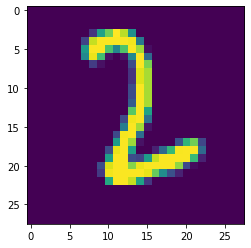

In [21]:
# view a sample image

x = np.random.randint(0,50000)
print(x)
print("target_variable",train_Y[x])
t1 = train_X[x].reshape(28,28)
plt.imshow(t1)

In [22]:
# Standardize the features using standard scaler
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
train_x = scaled.fit_transform(train_X)

In [27]:
# Model train using Random forest
time1 = time.process_time()
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
clf1.fit(scaled.transform(train_X),train_Y)
print("Score of Random Forest",clf1.score(scaled.transform(test_X),test_Y))
time2 = (time.process_time() -time1)
print("%5.3fs"%(time2))

Score of Random Forest 0.9703
45.254s


In [31]:
from sklearn.decomposition import PCA
time1 = time.process_time()
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(scaled.transform(train_X))
#clf2 = RandomForestClassifier()
#clf2.fit(X_reduced,train_Y)
x_reduced = pca.transform(scaled.transform(test_X))
#print("Score of Random Forestw with PCA",clf2.score(x_reduced,test_Y))
time2 = (time.process_time() -time1)
print("%5.3fs"%(time2))


24.818s


In [32]:
time1 = time.process_time()

clf2 = RandomForestClassifier()
clf2.fit(X_reduced,train_Y)
print("Score of Random Forest with PCA",clf2.score(x_reduced,test_Y))

time2 = (time.process_time() -time1)
print("%5.3fs"%(time2))



Score of Random Forestw with PCA 0.9386
187.730s


In [35]:
X_reduced.shape
#train_X.shape

(60000, 330)

In [41]:
sum(pca.explained_variance_ratio_[0:330])

0.9502261664083361

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
time1 = time.process_time()
clf3 = Pipeline([('ss',StandardScaler()),
                 ('pca',PCA(n_components = 0.95)),
                 ('rf',RandomForestClassifier())])
#clf2.fit(scaled.transform(train_X),train_Y)
clf3.fit(train_X,train_Y)
print("Score of PCA optimized Random Forest",clf3.score(test_X,test_Y))
time2 = (time.process_time() -time1)
print("%5.3fs"%(time2))

Score of PCA optimized Random Forest 0.9374
199.877s


In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(train_X)
X_embedded.shape

In [ ]:
# view a sample image

x = np.random.randint(0,50000)
print(x)
print("target_variable",train_Y[x])
t1 = X_embedded[x].reshape(28,28)
plt.imshow(t1)